<a href="https://colab.research.google.com/github/Karla20Paola/pruebaCB38/blob/master/PracticaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificación de flores


#Prerequisitos

In [13]:
pip install tflite-model-maker


     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 901kB 9.0MB/s 
     |████████████████████████████████| 325.3MB 32kB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 266kB 43.2MB/s 
     |████████████████████████████████| 1.1MB 36.2MB/s 
     |████████████████████████████████| 174kB 46.9MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 358kB 37.1MB/s 
     |████████████████████████████████| 36.6MB 120kB/s 
     |████████████████████████████████| 13.1MB 41.6MB/s 
     |████████████████████████████████| 460kB 28.8MB/s 
  Using cached https://files.pythonhosted.org/packages/89/e3/d576f6f02bc75bacbc3d42494e8f1d063c95617d86648dba243c2cb3963e/pybind11-2.5.0-py2.py3-none-any.whl
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=59a3870c2cda53a50e4a52c8ca43c980779fec14772bf414d07854e965e174c5
  Stored in directory: 

In [16]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

Obtener la ruta de datos pra conseguir algunas imágenes.


In [18]:
image_path = tf.keras.utils.get_file(
      'flower_photos',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      untar=True)

Paso 1. Cargue los datos de entrada específicos de una aplicación de aprendizaje automático en el dispositivo. Divídalo en datos de entrenamiento y datos de prueba.

In [19]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.



Paso 2. Personaliza el modelo de TensorFlow.

In [20]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
103/103 [==============================] - 174s 2s/step - loss: 1.0734 - accuracy: 0.6296
Epoch 2/5
103/103 [==============================] - 170s 2s/step - loss: 0.6563 - accuracy: 0.8963
Epoch 3/5
103/103 [==============================] - 169s 2s/step - loss: 0.6174 - accuracy: 0.9121
Epoch 4/5
103/103 [=======

Paso 3. Evalúe el modelo.



In [21]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 23s 2s/step - loss: 0.6116 - accuracy: 0.9319


Paso 4. Exportar al modelo de TensorFlow Lite.

Aquí, exportamos el modelo de TensorFlow Lite con metadatos que proporciona un estándar para las descripciones del modelo. Puede descargarlo en la barra lateral izquierda al igual que la parte de carga para su propio uso.


In [22]:
model.export(export_dir='.')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmpdk9imb7t/assets


INFO:tensorflow:Assets written to: /tmp/tmpdk9imb7t/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpaym838_h/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpaym838_h/labels.txt.


Paso 1: Cargar datos de entrada específicos para una aplicación de aprendizaje automático en el dispositivo

In [26]:
image_path = tf.keras.utils.get_file(
      'flower_photos',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      untar=True)

Utilice la clase ImageClassifierDataLoader para cargar datos.

En cuanto al método from_folder (), podría cargar datos desde la carpeta. Asume que los datos de imagen de la misma clase están en el mismo subdirectorio y que el nombre de la subcarpeta es el nombre de la clase. Actualmente, se admiten imágenes codificadas en JPEG e imágenes codificadas en PNG.

In [27]:
data = ImageClassifierDataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Divídalo en datos de entrenamiento (80%), datos de validación (10%, opcional) y datos de prueba (10%).

In [29]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)


Muestre 25 ejemplos de imágenes con etiquetas.

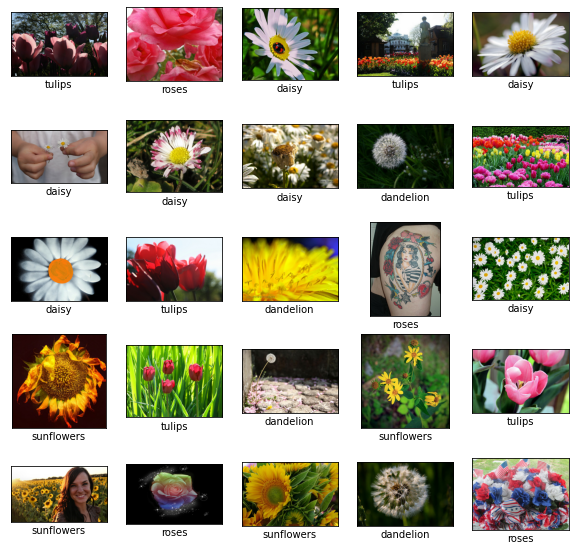

In [30]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

Paso 2: personaliza el modelo de TensorFlow
Cree un modelo de clasificador de imágenes personalizado basado en los datos cargados. El modelo predeterminado es EfficientNet-Lite0.


In [31]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 174s 2s/step - loss: 1.1618 - accuracy: 0.6013 - val_loss: 0.7255 - val_accuracy: 0.8523
Epoch 2/5
91/91 [==============================] - 174s 2s/step - loss: 0.6665 - accuracy: 0.8887 - val_loss: 0.6939 - val_accuracy: 0.8835
Epoch 3/5
91/91 [==============================] - 172s 2s/step - loss: 0.6366 - accu


Estructura detallada del modelo.

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


Paso 3: evaluar el modelo personalizado
Evalúe el resultado del modelo, obtenga la pérdida y precisión del modelo.


In [33]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 23s 2s/step - loss: 0.6219 - accuracy: 0.9183


Podríamos trazar los resultados previstos en 100 imágenes de prueba. Las etiquetas pronosticadas con color rojo son los resultados predichos incorrectos, mientras que otras son correctas.


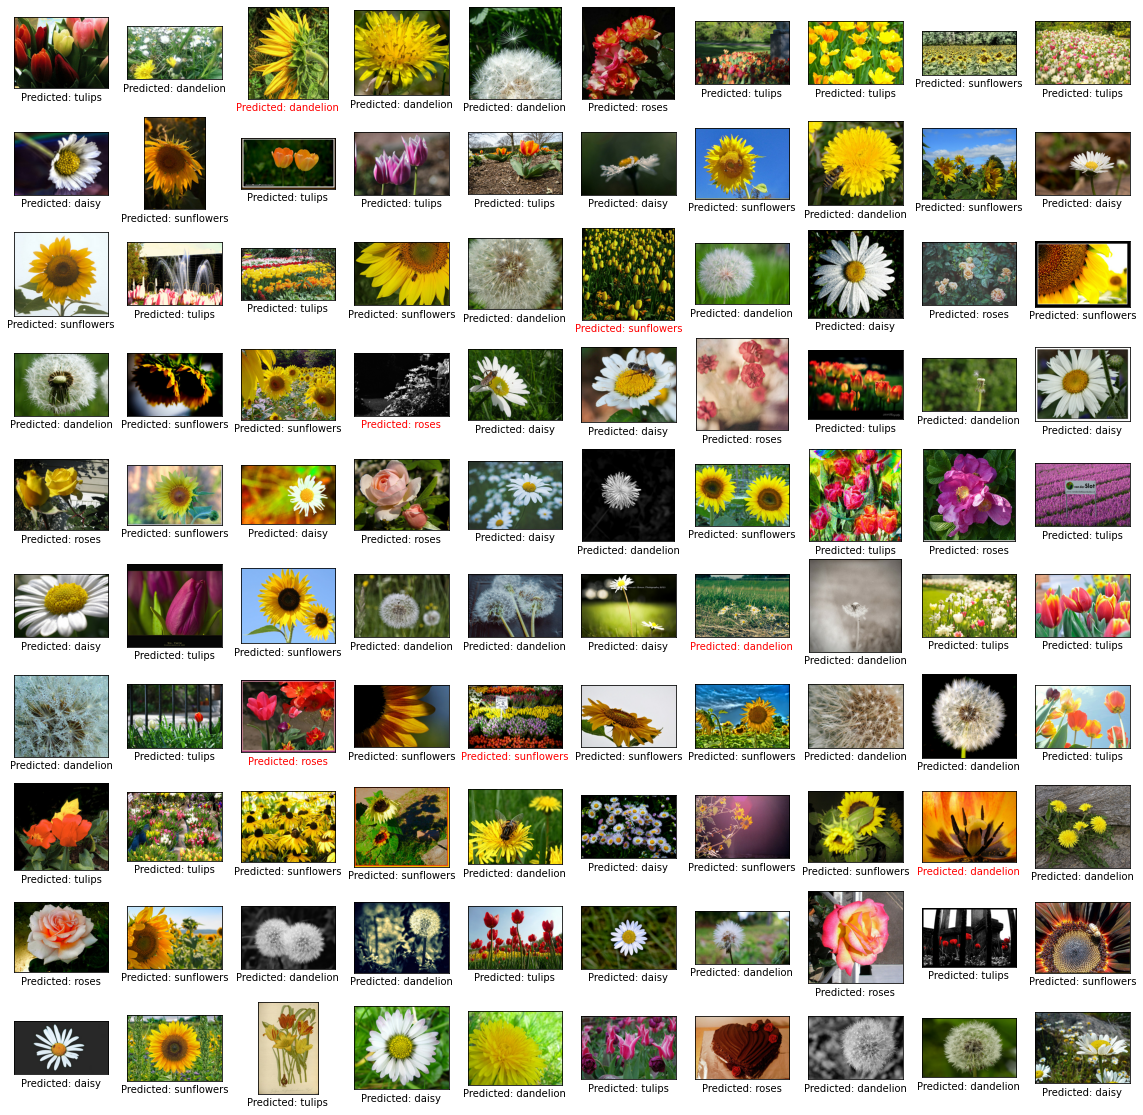

In [34]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

Paso 4: Exportar al modelo de TensorFlow Lite
Convierta el modelo existente al formato de modelo de TensorFlow Lite y guarde las etiquetas de la imagen en un archivo de etiqueta. El nombre de archivo TFLite predeterminado es model.tflite, el nombre de archivo de etiqueta predeterminado es label.txt.

In [35]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpp478w7i0/assets


INFO:tensorflow:Assets written to: /tmp/tmpp478w7i0/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmplmu1t51w/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmplmu1t51w/labels.txt.


También puede evaluar el modelo tflite con el método evalua_tflite.

In [36]:
model.evaluate_tflite('model.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.5254902  0.4392157  0.25490198]
   [0.5759104  0.45378152 0.29579833]
   [0.6061625  0.47282913 0.32380953]
   ...
   [0.9624648  0.7277306  0.7999998 ]
   [0.9803923  0.75238097 0.8184876 ]
   [0.96134466 0.7445377  0.77478963]]

  [[0.5257703  0.46442577 0.26358545]
   [0.5763106  0.47915167 0.3021609 ]
   [0.60624254 0.4827531  0.320008  ]
   ...
   [0.9679472  0.7200476  0.77502984]
   [0.9879153  0.75010014 0.80480206]
   [0.9708685  0.74345744 0.7675868 ]]

  [[0.53053224 0.48459384 0.2739496 ]
   [0.5827131  0.49547818 0.30444178]
   [0.607363   0.48795518 0.3070028 ]
   ...
   [0.9611847  0.6993194  0.7337335 ]
   [0.9842338  0.7250101  0.7698281 ]
   [0.96390575 0.7198881  0.74517804]]

  ...

  [[0.912325   0.87254876 0.5624651 ]
   [0.9224091  0.8681469  0.5605445 ]
   [0.95306134 0.83605415 0.6047222 ]
   ...
   [0.0195679  0.04701888 0.0195679 ]
   [0.02537015 0.05282113 0.02537015]
   [0.0336135  0.06106448 0.0336135 ]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.5254902  0.4392157  0.25490198]
   [0.5759104  0.45378152 0.29579833]
   [0.6061625  0.47282913 0.32380953]
   ...
   [0.9624648  0.7277306  0.7999998 ]
   [0.9803923  0.75238097 0.8184876 ]
   [0.96134466 0.7445377  0.77478963]]

  [[0.5257703  0.46442577 0.26358545]
   [0.5763106  0.47915167 0.3021609 ]
   [0.60624254 0.4827531  0.320008  ]
   ...
   [0.9679472  0.7200476  0.77502984]
   [0.9879153  0.75010014 0.80480206]
   [0.9708685  0.74345744 0.7675868 ]]

  [[0.53053224 0.48459384 0.2739496 ]
   [0.5827131  0.49547818 0.30444178]
   [0.607363   0.48795518 0.3070028 ]
   ...
   [0.9611847  0.6993194  0.7337335 ]
   [0.9842338  0.7250101  0.7698281 ]
   [0.96390575 0.7198881  0.74517804]]

  ...

  [[0.912325   0.87254876 0.5624651 ]
   [0.9224091  0.8681469  0.5605445 ]
   [0.95306134 0.83605415 0.6047222 ]
   ...
   [0.0195679  0.04701888 0.0195679 ]
   [0.02537015 0.05282113 0.02537015]
   [0.0336135  0.06106448 0.0336135 ]]

  [[0.

{'accuracy': 0.9182561307901907}

La función de creación contiene los siguientes pasos:

1. Divida los datos en datos de entrenamiento, validación y prueba de acuerdo con el parámetro validation_ratio y test_ratio. El valor predeterminado de validation_ratio y test_ratio son 0.1 y 0.1.
2. Descarga un vector de características de imagen como modelo base de TensorFlow Hub. El modelo pre-entrenado predeterminado es EfficientNet-Lite0.
3. Agregue un cabezal clasificador con una capa de abandono con dropout_rate entre la capa del cabezal y el modelo previamente entrenado. El dropout_rate predeterminado es el valor predeterminado de dropout_rate de make_image_classifier_lib de TensorFlow Hub.
4. Procese previamente los datos de entrada sin procesar. Actualmente, los pasos de preprocesamiento incluyen normalizar el valor de cada píxel de la imagen para modelar la escala de entrada y cambiar su tamaño al tamaño de entrada del modelo. EfficientNet-Lite0 tiene la escala de entrada [0, 1] y el tamaño de la imagen de entrada [224, 224, 3].
5. Introduzca los datos en el modelo de clasificador. De forma predeterminada, los parámetros de entrenamiento, como las épocas de entrenamiento, el tamaño del lote, la tasa de aprendizaje y el impulso, son los valores predeterminados de make_image_classifier_lib de TensorFlow Hub. Solo se entrena el cabezal clasificador.
En esta sección, describimos varios temas avanzados, incluido el cambio a un modelo de clasificación de imágenes diferente, el cambio de los hiperparámetros de entrenamiento, etc.


Model Maker admite múltiples opciones de cuantificación posteriores al entrenamiento. Tomemos como ejemplo la cuantificación completa de enteros. Primero, defina la configuración de cuantificación para hacer cumplir la cuantificación entera completa para todas las operaciones, incluida la entrada y la salida. El tipo de entrada y el tipo de salida son uint8 por defecto. También puede cambiarlos a otros tipos como int8 configurando inference_input_type e inference_output_type en config.

In [38]:
config = configs.QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)

Exportamos el modelo de TensorFlow Lite con dicha configuración.

In [39]:
model.export(export_dir='.', tflite_filename='model_quant.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmp0_5akz8d/assets


INFO:tensorflow:Assets written to: /tmp/tmp0_5akz8d/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpm8tuhfby/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpm8tuhfby/labels.txt.


Cambiar el modelo

In [40]:
model = image_classifier.create(train_data, model_spec=model_spec.mobilenet_v2_spec, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 138s 2s/step - loss: 1.1942 - accuracy: 0.6120 - val_loss: 0.7592 - val_accuracy: 0.8438
Epoch 2/5
91/91 [==============================] - 134s 1s/step - loss: 0.7311 - accuracy: 0.8717 - val_loss: 0.7220 - val_accuracy: 0.8494
Epoch 3/5
91/91 [==============================] - 134s 1s/step - loss: 0.6579 - accu


Evalúe el modelo MobileNetV2 recientemente reentrenado para ver la precisión y la pérdida en los datos de prueba.

In [41]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 18s 2s/step - loss: 0.6552 - accuracy: 0.9019



Cambiar al modelo en TensorFlow Hub


In [44]:
inception_v3_spec = model_spec.ImageModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

Cambiar los hiperparámetros de entrenamiento.

También podríamos cambiar los hiperparámetros de entrenamiento como epochs, dropout_rate y batch_size que podrían afectar la precisión del modelo. Por ejemplo,

-épocas: más épocas podrían lograr una mejor precisión hasta que converja, pero el entrenamiento para demasiadas épocas puede conducir a un sobreajuste.
dropout_rate: evita el sobreajuste.
-batch_size: número de muestras que se utilizarán en un paso de formación.
-validation_data: número de muestras para usar en un paso de entrenamiento.
Por ejemplo, podríamos entrenar con más épocas.-

In [45]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_3 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10
91/91 [==============================] - 173s 2s/step - loss: 1.1617 - accuracy: 0.5883 - val_loss: 0.7225 - val_accuracy: 0.8409
Epoch 2/10
91/91 [==============================] - 171s 2s/step - loss: 0.6796 - accuracy: 0.8747 - val_loss: 0.6932 - val_accuracy: 0.8608
Epoch 3/10
91/91 [==============================] - 172s 2s/step - loss: 0.6381 - a

Evalúe el modelo recién reentrenado con 10 épocas de entrenamiento.

In [46]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 22s 2s/step - loss: 0.6027 - accuracy: 0.9183
